In [9]:
import pandas as pd
from paths import DATA_DIR
from pathlib import Path

vc_dir = DATA_DIR / "VoxCommunis"
utmos_dir = vc_dir / "UTMOS_data"

# UTMOS

In [10]:
utmos_dir = vc_dir / "UTMOS_data"

def get_vc_utmos_summary(split, version, epochs, sparc=True, generator_version="sparc_multi"):
    if sparc:
        #sparc
        utmos_fp = utmos_dir / f"decoder_files_sparc/{split}/{generator_version}" / "utmos.csv"
        df = pd.read_csv(utmos_fp, names=["id", "sparc"])
        df["lang"] = df["id"].apply(lambda x: x.split("_")[2])
        summary_df = df.copy()
    else:
        summary_df = None
    #v6
    for epoch in epochs:
        ckpt_name = f"grad_{epoch}"
        utmos_fp = utmos_dir / f"decoder_files_{version}/{split}/{ckpt_name}/{generator_version}" / "utmos.csv"

        col = f"{version}_{ckpt_name}"
        df = pd.read_csv(utmos_fp, names=["id", col])
        df["id"] = df["id"].apply(lambda x: x.replace("_decoder", ""))
        if summary_df is None:
            summary_df = df
        else:
            summary_df = summary_df.merge(df, on="id")
        #df["lang"] = df["id"].apply(lambda x: x.split("_")[2])
        #df.groupby("lang").agg({"utmos": ["mean", "std", "count"]})
    return summary_df

## v6

In [13]:
split = "test-20h"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000, 4000, 5000]
summary_df = get_vc_utmos_summary(split, version, epochs, sparc=True)
summary_df.groupby("lang").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_200,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000,v6_grad_4000,v6_grad_5000
lang,,,,,,,,
it,2.538623,2.262581,2.361615,2.406797,2.428872,2.400187,2.429281,2.352388
sw,2.327806,2.132409,2.216644,2.273725,2.291061,2.269385,2.294846,2.234100
zh-CN,2.406435,2.045304,2.126144,2.193543,2.191061,2.191433,2.200462,2.125420


In [14]:
split = "dev-1h"
version = "v6"
epochs = [500, 1000, 2000, 3000, 4000, 5000]
summary_df = get_vc_utmos_summary(split, version, epochs, sparc=True)
summary_df.groupby("lang").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000,v6_grad_4000,v6_grad_5000
lang,,,,,,,
it,2.586055,2.417646,2.445828,2.470474,2.478387,2.489534,2.420858
zh-CN,2.577780,2.295591,2.411259,2.403896,2.391502,2.420626,2.311795


When listening italian sounds italian chinese not very chinese for v6 and sw ok

## v6_zhCN

In [5]:
split = "test-20h"
version = "v6_zhCN"
epochs = [1000, 2000, 3000, 4000, 5000]
summary_df = get_vc_utmos_summary(split, version, epochs, sparc=True)
summary_df.groupby("lang").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000,v6_zhCN_grad_4000,v6_zhCN_grad_5000
lang,,,,,,
it,2.538623,2.116334,2.135932,2.143549,2.113514,2.065747
sw,2.327806,2.043563,2.043613,2.043563,2.028757,1.963303
zh-CN,2.406435,2.291204,2.292911,2.295652,2.259353,2.227807


In [6]:
split = "dev-1h"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000, 4000, 5000]
summary_df = get_vc_utmos_summary(split, version, epochs, sparc=True)
summary_df.groupby("lang").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_500,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000,v6_zhCN_grad_4000,v6_zhCN_grad_5000
lang,,,,,,,
it,2.586055,2.231953,2.193827,2.181902,2.197134,2.166817,2.108609
zh-CN,2.577780,2.493274,2.466704,2.443325,2.474537,2.466960,2.430223


Better scores for chinese but still very low, UTMOS probably doesn't mean much for non english audio

## msml1h

In [7]:
split = "dev-1h"
version = "msml1h"
epochs = [1000, 2000]
summary_df = get_vc_utmos_summary(split, version, epochs, sparc=True)
summary_df = summary_df.groupby("lang").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
summary_df = summary_df.reset_index(level=0)
summary_df

,lang,sparc,msml1h_grad_1000,msml1h_grad_2000
0,ba,2.706678,2.521148,2.567881
1,be,2.778133,2.615770,2.623062
2,bg,2.778733,2.737800,2.727227
3,bn,2.634316,2.389688,2.467481
4,ca,2.704930,2.389996,2.464349
5,ckb,2.903852,2.724979,2.778612
6,cs,2.965305,2.822793,2.868765
7,cv,3.048328,2.854497,2.907647
8,dv,2.464986,2.278905,2.313927
9,el,2.975305,2.739648,2.742538


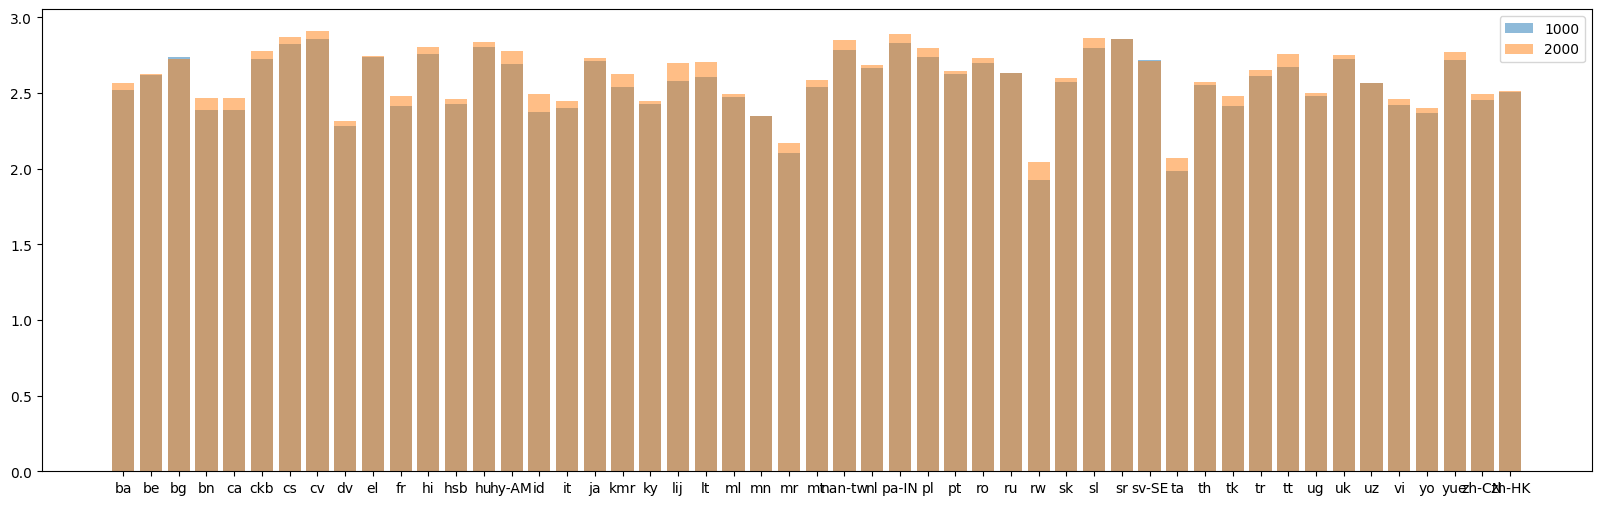

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
#plt.bar(summary_df["lang"], summary_df["sparc"], label="sparc", alpha=0.5)
plt.bar(summary_df["lang"], summary_df["msml1h_grad_1000"], label="1000", alpha=0.5)
plt.bar(summary_df["lang"], summary_df["msml1h_grad_2000"], label="2000", alpha=0.5)
plt.legend()
plt.show()
plt.tight_layout()

Better scores for chinese but still very low, UTMOS probably doesn't mean much for non english audio

# Compare v6 EMA vs SPARC EMA

In [15]:
import pandas as pd
from paths import DATA_DIR
from pathlib import Path

vc_dir = DATA_DIR / "VoxCommunis"

In [16]:
def get_pcc_sparc_analysis(split, version, epochs):
    summary_df = None
    for epoch in epochs:
        gradname = f"grad_{epoch}"
        analysis_fp = vc_dir / split / "analysis" / f"quanti_art_comp_{version}_{gradname}.csv"
        df = pd.read_csv(analysis_fp)
        df["lang"] = df["sample_id"].apply(lambda x: x.split("_")[2])
        df = df.groupby("lang").mean(["pcc_ema", "pcc_pitch", "pcc_loudness"])
        df["version"] = version
        df["epoch"] = epoch
        df.reset_index(inplace=True)
        if summary_df is None:
            summary_df = df
        else:
            summary_df = pd.concat([summary_df, df], axis=0)
    summary_df = summary_df[["lang", "version", "epoch", "pcc_ema", "pcc_pitch", "pcc_loudness"]]
    summary_df.sort_values(by=["lang", "version", "epoch"], inplace=True)
    return summary_df

## v6

In [17]:
split = "test-20h"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000, 4000, 5000]

summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,it,v6,200,0.774598,0.383726,0.768860
0,it,v6,500,0.778463,0.381220,0.779223
0,it,v6,1000,0.782425,0.366670,0.779874
0,it,v6,2000,0.781995,0.356569,0.789193
0,it,v6,3000,0.780127,0.366173,0.788512
0,it,v6,4000,0.780837,0.373111,0.786892
0,it,v6,5000,0.774599,0.347330,0.780842
1,sw,v6,200,0.693255,0.307564,0.685187
1,sw,v6,500,0.694900,0.298243,0.699609
1,sw,v6,1000,0.699152,0.288376,0.704686


In [18]:
split = "dev-1h"
version = "v6"
epochs = [500, 1000, 2000, 3000, 4000, 5000]

summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,fr,v6,500,0.656817,0.354879,0.732271
0,fr,v6,1000,0.650837,0.337746,0.731931
0,fr,v6,2000,0.652984,0.335179,0.738280
0,fr,v6,3000,0.649976,0.374433,0.740621
0,fr,v6,4000,0.652476,0.339071,0.742497
0,fr,v6,5000,0.643607,0.306762,0.731424
1,it,v6,500,0.777395,0.404342,0.789944
1,it,v6,1000,0.783284,0.397354,0.791793
1,it,v6,2000,0.782267,0.390770,0.793805
1,it,v6,3000,0.778816,0.408928,0.799225


## v6_zhCN

In [19]:
split = "test-20h"
version = "v6_zhCN"
epochs = [1000, 2000, 3000, 4000, 5000]
summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,it,v6_zhCN,1000,0.671686,0.316464,0.700386
0,it,v6_zhCN,2000,0.670172,0.310934,0.700933
0,it,v6_zhCN,3000,0.663835,0.311851,0.698444
0,it,v6_zhCN,4000,0.667226,0.294408,0.704065
0,it,v6_zhCN,5000,0.665106,0.318249,0.697111
1,sw,v6_zhCN,1000,0.670975,0.301290,0.670246
1,sw,v6_zhCN,2000,0.668791,0.294922,0.666417
1,sw,v6_zhCN,3000,0.664734,0.290935,0.664541
1,sw,v6_zhCN,4000,0.668479,0.282452,0.668219
1,sw,v6_zhCN,5000,0.666577,0.296775,0.665217


In [20]:
split = "dev-1h"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000, 4000, 5000]

summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,fr,v6_zhCN,500,0.618157,0.278636,0.694083
0,fr,v6_zhCN,1000,0.621400,0.275890,0.696524
0,fr,v6_zhCN,2000,0.620650,0.294999,0.696400
0,fr,v6_zhCN,3000,0.607208,0.277803,0.687278
0,fr,v6_zhCN,4000,0.611074,0.278990,0.693098
0,fr,v6_zhCN,5000,0.611982,0.264356,0.690041
1,it,v6_zhCN,500,0.672682,0.306025,0.713678
1,it,v6_zhCN,1000,0.673881,0.302506,0.713231
1,it,v6_zhCN,2000,0.677679,0.313484,0.711736
1,it,v6_zhCN,3000,0.668810,0.313776,0.711881


## msml1h

In [43]:
split = "dev-1h"
version = "msml1h"
epochs = [1000, 2000, 3000,]
summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,ba,msml1h,1000,0.731026,0.343557,0.822689
0,ba,msml1h,2000,0.726766,0.339528,0.822023
0,ba,msml1h,3000,0.724573,0.367931,0.835025
1,be,msml1h,1000,0.778176,0.381797,0.783228
1,be,msml1h,2000,0.773016,0.400118,0.774529
...,...,...,...,...,...,...
49,zh-CN,msml1h,2000,0.729829,0.311851,0.731212
49,zh-CN,msml1h,3000,0.730480,0.289471,0.745831
50,zh-HK,msml1h,1000,0.777340,0.373864,0.772083
50,zh-HK,msml1h,2000,0.774402,0.368420,0.768798


Epoch 1000 mean pcc_ema 0.737 pcc_pitch 0.385,pcc_loudness, 0.771
Epoch 2000 mean pcc_ema 0.732 pcc_pitch 0.386,pcc_loudness, 0.773
Epoch 3000 mean pcc_ema 0.728 pcc_pitch 0.392,pcc_loudness, 0.780


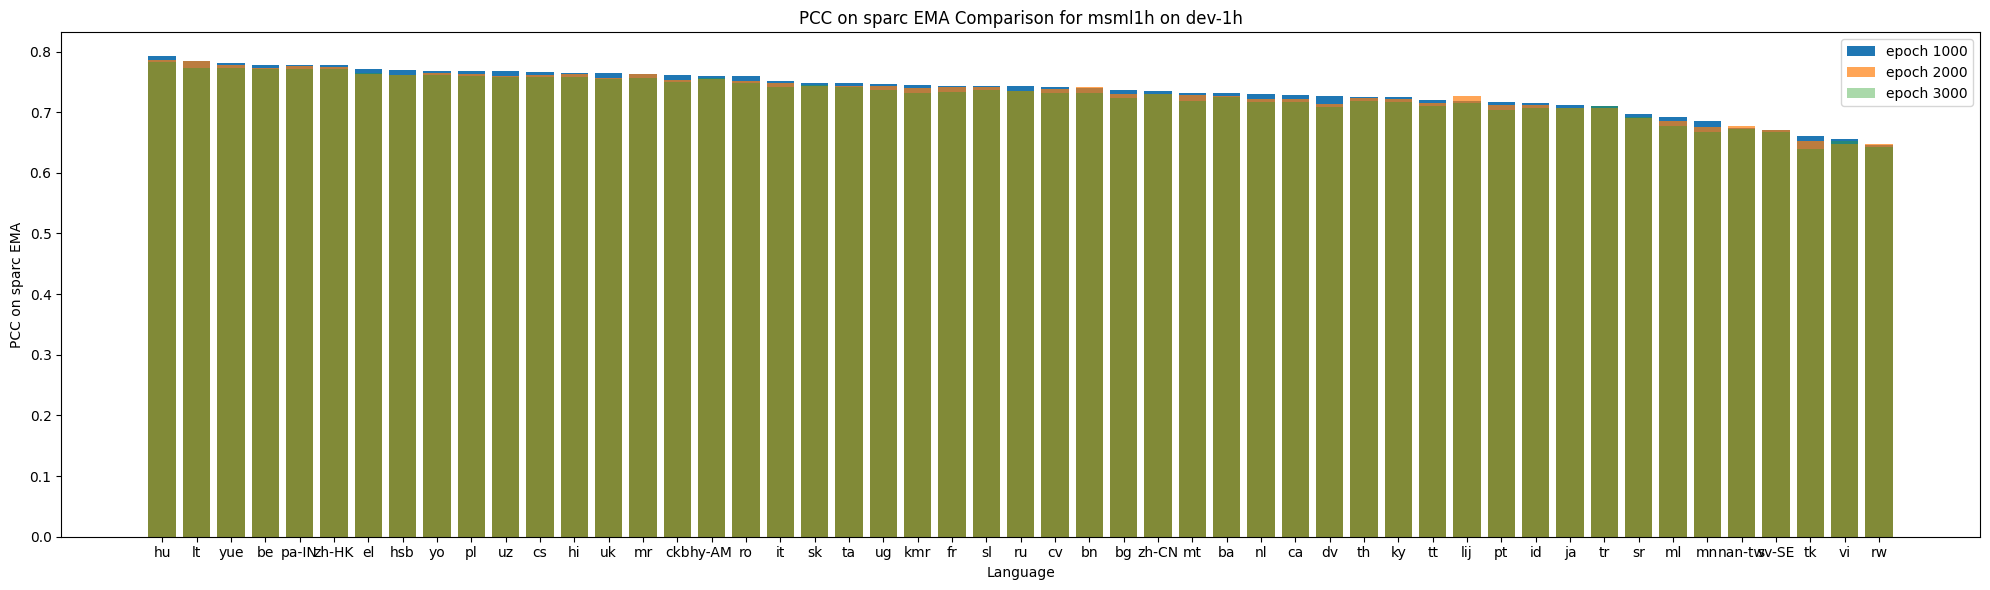

In [8]:
import matplotlib.pyplot as plt

df_1000 = summary_df[summary_df["epoch"]==1000]
df_2000 = summary_df[summary_df["epoch"]==2000]
df_3000 = summary_df[summary_df["epoch"]==3000]
df_1000 = df_1000.sort_values(by="pcc_ema", ascending=False)
# show only first 2 decimals in print

print("Epoch 1000 mean pcc_ema", f"{df_1000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_1000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_1000["pcc_loudness"].mean():.3f}")
print("Epoch 2000 mean pcc_ema", f"{df_2000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_2000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_2000["pcc_loudness"].mean():.3f}")
print("Epoch 3000 mean pcc_ema", f"{df_3000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_3000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_3000["pcc_loudness"].mean():.3f}")
plt.figure(figsize=(20,6))
plt.bar(df_1000["lang"], df_1000["pcc_ema"], label="epoch 1000")
plt.bar(df_2000["lang"], df_2000["pcc_ema"], label="epoch 2000", alpha=0.7)
plt.bar(df_3000["lang"], df_3000["pcc_ema"], label="epoch 3000", alpha=0.4)
plt.xlabel("Language")
plt.ylabel("PCC on sparc EMA")
plt.title(f"PCC on sparc EMA Comparison for {version} on {split}")
plt.legend()
plt.tight_layout()

# msml1h zero-shot

In [45]:
split = "test-1h"
version = "msml1h"
epochs = [1000, 2000, 3000,4000]
summary_df = get_pcc_sparc_analysis(split, version, epochs)
summary_df

,lang,version,epoch,pcc_ema,pcc_pitch,pcc_loudness
0,ab,msml1h,1000,0.620214,0.317378,0.629128
0,ab,msml1h,2000,0.621535,0.360038,0.631664
0,ab,msml1h,3000,0.610901,0.329925,0.639128
0,ab,msml1h,4000,0.612603,0.344927,0.622616
1,eu,msml1h,1000,0.724042,0.335827,0.769231
1,eu,msml1h,2000,0.711708,0.343429,0.762761
1,eu,msml1h,3000,0.705692,0.370429,0.769682
1,eu,msml1h,4000,0.705663,0.348549,0.765668
2,gn,msml1h,1000,0.688677,0.356170,0.768920
2,gn,msml1h,2000,0.677071,0.359650,0.761995


Epoch 1000 mean pcc_ema 0.686 pcc_pitch 0.335,pcc_loudness, 0.721
Epoch 2000 mean pcc_ema 0.681 pcc_pitch 0.350,pcc_loudness, 0.718
Epoch 3000 mean pcc_ema 0.672 pcc_pitch 0.355,pcc_loudness, 0.727


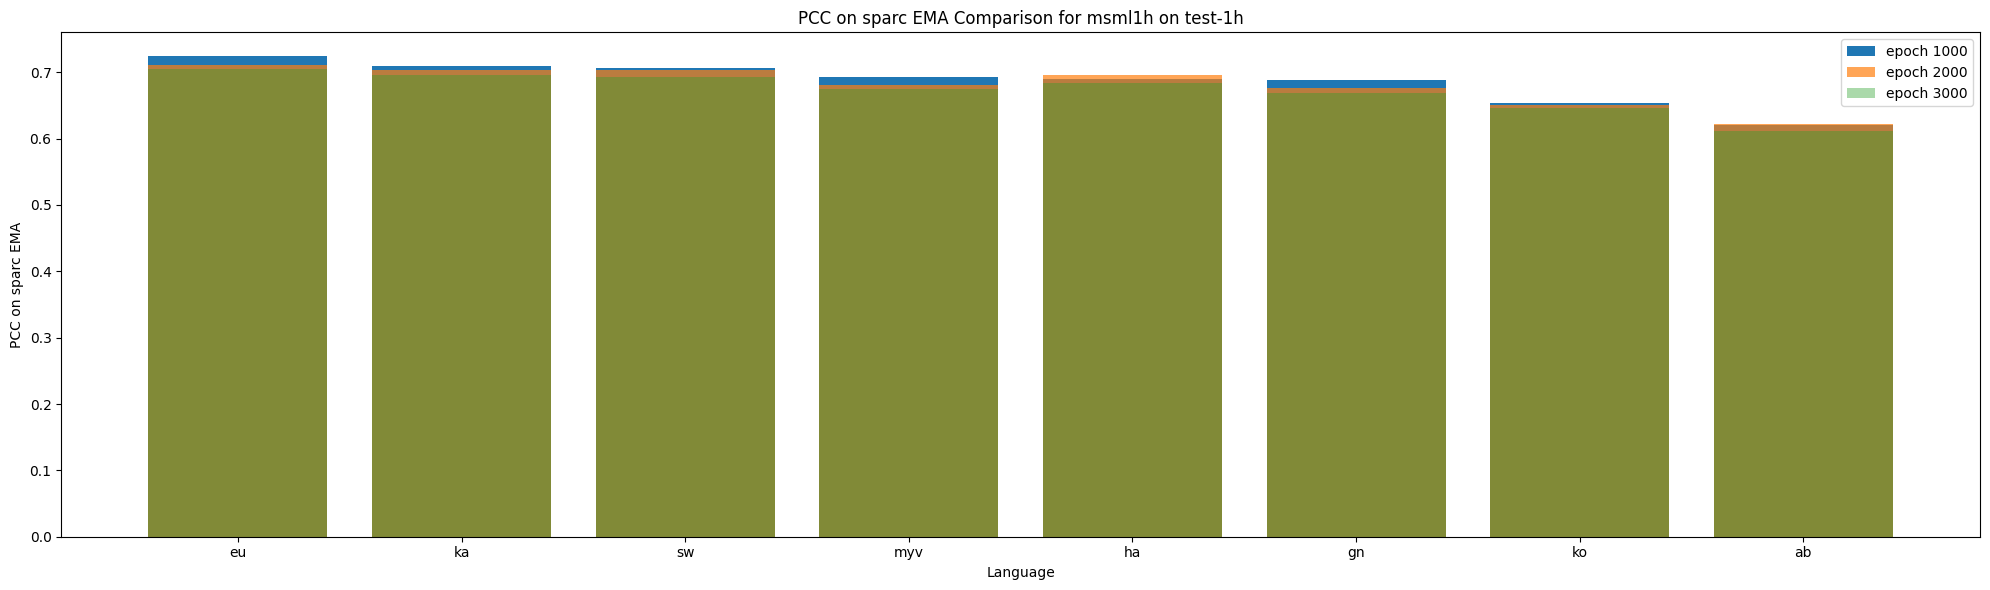

In [46]:
import matplotlib.pyplot as plt

df_1000 = summary_df[summary_df["epoch"]==1000]
df_2000 = summary_df[summary_df["epoch"]==2000]
df_3000 = summary_df[summary_df["epoch"]==3000]
df_1000 = df_1000.sort_values(by="pcc_ema", ascending=False)
# show only first 2 decimals in print

print("Epoch 1000 mean pcc_ema", f"{df_1000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_1000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_1000["pcc_loudness"].mean():.3f}")
print("Epoch 2000 mean pcc_ema", f"{df_2000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_2000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_2000["pcc_loudness"].mean():.3f}")
print("Epoch 3000 mean pcc_ema", f"{df_3000["pcc_ema"].mean():.3f}", \
      f"pcc_pitch {df_3000["pcc_pitch"].mean():.3f},"  \
      f"pcc_loudness, {df_3000["pcc_loudness"].mean():.3f}")
plt.figure(figsize=(20,6))
plt.bar(df_1000["lang"], df_1000["pcc_ema"], label="epoch 1000")
plt.bar(df_2000["lang"], df_2000["pcc_ema"], label="epoch 2000", alpha=0.7)
plt.bar(df_3000["lang"], df_3000["pcc_ema"], label="epoch 3000", alpha=0.4)
plt.xlabel("Language")
plt.ylabel("PCC on sparc EMA")
plt.title(f"PCC on sparc EMA Comparison for {version} on {split}")
plt.legend()
plt.tight_layout()

In [52]:
# Compare with scores on train languages dev-1h
split = "dev-1h"
version = "msml1h"
epochs = [1000, 2000, 3000, 4000]
train_lang_df = get_pcc_sparc_analysis(split, version, epochs)

split = "test-1h"
zeroshot_lang_df = get_pcc_sparc_analysis(split, version, epochs)

print(zeroshot_lang_df.groupby("epoch").mean("pcc_ema", "pcc_pitch", "pcc_loudness"))
print(train_lang_df.groupby("epoch").mean("pcc_ema", "pcc_pitch", "pcc_loudness"))

        pcc_ema  pcc_pitch  pcc_loudness
epoch                                   
1000   0.685529   0.335180      0.721480
2000   0.680654   0.350062      0.717838
3000   0.672475   0.354881      0.727276
4000   0.674414   0.340090      0.719890
        pcc_ema  pcc_pitch  pcc_loudness
epoch                                   
1000   0.736696   0.384540      0.771118
2000   0.732257   0.385727      0.772913
3000   0.728052   0.392168      0.780414
4000   0.731164   0.381165      0.775535


# Custom datasets

## UTMOS

In [24]:
def get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version=""):
    if sparc:
        #sparc
        utmos_fp = vc_dir / split / "UTMOS_data/decoder_files_sparc" / "utmos.csv"

        df = pd.read_csv(utmos_fp, names=["id", "sparc"])
        df["spk"] = df["id"].apply(lambda x: x.split("_")[spk_parse_idx])
        summary_df = df.copy()
    else:
        summary_df = None
    #v6
    for epoch in epochs:
        ckpt_name = f"grad_{epoch}"
        utmos_fp = vc_dir / split / f"UTMOS_data/decoder_files_{version}/{ckpt_name}/{generator_version}" / "utmos.csv"

        col = f"{version}_{ckpt_name}"
        df = pd.read_csv(utmos_fp, names=["id", col])
        df["id"] = df["id"].apply(lambda x: x.replace("_decoder", ""))
        if summary_df is None:
            summary_df = df
        else:
            summary_df = summary_df.merge(df, on="id")
        df["spk"] = df["id"].apply(lambda x: x.split("_")[spk_parse_idx])
        #df.groupby("lang").agg({"utmos": ["mean", "std", "count"]})
    return summary_df

### v6

In [30]:
spk_parse_idx = 1
split = "MNGU0"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True)
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_200,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000
spk,,,,,,
s1,4.066768,3.131459,3.244852,3.271042,3.314405,3.290503


In [27]:
spk_parse_idx = 0
split = "mocha_timit"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True)
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_200,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000
spk,,,,,,
faet0,3.619851,2.859124,3.066952,3.135401,3.120933,3.118225
ffes0,3.709994,3.140557,3.357241,3.405119,3.408772,3.414674
fsew0,3.858155,3.189492,3.376991,3.468677,3.408348,3.376236
maps0,3.614031,3.046623,3.154210,3.188140,3.195747,3.201526
mjjn0,3.899815,3.079492,3.225973,3.265308,3.260294,3.214376
msak0,3.661370,2.872527,2.936515,3.048135,3.010428,3.045421


In [28]:
spk_parse_idx = 0
split = "MSPKA_EMA_ita"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True)
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_200,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000
spk,,,,,,
cnz,3.420058,2.798007,2.897695,2.898640,2.931788,2.960722
lls,3.150999,2.829546,3.015733,3.054754,3.042685,3.028951
olm,3.217961,2.253204,2.408670,2.444903,2.441446,2.415338


In [29]:
spk_parse_idx = 0
split = "pb2007"
version = "v6"
epochs = [200, 500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True)
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_grad_200,v6_grad_500,v6_grad_1000,v6_grad_2000,v6_grad_3000
spk,,,,,,
item,2.972503,2.468794,2.55535,2.582724,2.516126,2.471208


### v6_zhCN

In [31]:
spk_parse_idx = 1
split = "MNGU0"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_500,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000
spk,,,,,
s1,4.066768,3.230785,3.236484,3.249453,3.227857


In [32]:
spk_parse_idx = 0
split = "mocha_timit"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_500,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000
spk,,,,,
faet0,3.619851,2.741834,2.763382,2.720583,2.737833
ffes0,3.709994,3.093308,3.085013,3.103303,3.050969
fsew0,3.858155,3.349856,3.314693,3.361773,3.292834
maps0,3.614031,3.113114,3.082083,3.082243,3.065451
mjjn0,3.899815,3.065142,3.029926,3.073210,3.044912
msak0,3.661370,2.890156,2.952218,2.971328,2.914775


In [33]:
spk_parse_idx = 0
split = "MSPKA_EMA_ita"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_500,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000
spk,,,,,
cnz,3.420058,2.754494,2.723100,2.677181,2.711767
lls,3.150999,2.762583,2.788159,2.728706,2.767059
olm,3.217961,2.265867,2.278209,2.226980,2.236342


In [34]:
spk_parse_idx = 0
split = "pb2007"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,v6_zhCN_grad_500,v6_zhCN_grad_1000,v6_zhCN_grad_2000,v6_zhCN_grad_3000
spk,,,,,
item,2.972503,2.572059,2.653483,2.679367,2.705042


### msml1h

In [35]:
spk_parse_idx = 1
split = "MNGU0"
version = "msml1h"
epochs = [500, 1000, 2000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,msml1h_grad_500,msml1h_grad_1000,msml1h_grad_2000
spk,,,,
s1,4.066768,3.410528,3.44155,3.473225


In [36]:
spk_parse_idx = 0
split = "mocha_timit"
version = "msml1h"
epochs = [500, 1000, 2000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,msml1h_grad_500,msml1h_grad_1000,msml1h_grad_2000
spk,,,,
faet0,3.619851,3.179793,3.174476,3.240499
ffes0,3.709994,3.442099,3.387484,3.491679
fsew0,3.858155,3.545485,3.473607,3.532676
maps0,3.614031,3.293295,3.328533,3.332809
mjjn0,3.899815,3.339553,3.341975,3.385487
msak0,3.661370,3.207551,3.192408,3.246285


In [37]:
spk_parse_idx = 0
split = "MSPKA_EMA_ita"
version = "msml1h"
epochs = [500, 1000, 2000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,msml1h_grad_500,msml1h_grad_1000,msml1h_grad_2000
spk,,,,
cnz,3.420058,2.925788,2.812559,2.903153
lls,3.150999,3.073638,3.003100,3.117078
olm,3.217961,2.459480,2.392093,2.456475


In [38]:
spk_parse_idx = 0
split = "pb2007"
version = "msml1h"
epochs = [500, 1000, 2000]
summary_df = get_custom_utmos_summary(split, version, epochs, spk_parse_idx, sparc=True, generator_version="sparc_multi")
summary_df.groupby("spk").mean(["sparc"] + [f"{version}_grad_{e}" for e in epochs])
#summary_df.groupby("spk").mean([f"{version}_grad_{e}" for e in epochs])

,sparc,msml1h_grad_500,msml1h_grad_1000,msml1h_grad_2000
spk,,,,
item,2.972503,2.720761,2.748714,2.759274


## EMA pcc

In [24]:
def get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx):
    summary_df = None
    for epoch in epochs:
        gradname = f"grad_{epoch}"
        analysis_fp = vc_dir / split / "analysis" / f"quanti_gt_art_comp_{version}_{gradname}.csv"
        df = pd.read_csv(analysis_fp)
        df["spk"] = df["sample_id"].apply(lambda x: x.split("_")[spk_parse_idx])
        df = df.groupby("spk").mean(['pcc_gt_dec_ema', 'pcc_gt_sparc_ema',
                                     'pcc_sparc_dec_ema','pcc_sparc_dec_pitch',
                                     'pcc_sparc_dec_loudness'])
        df["version"] = version
        df["epoch"] = epoch
        df.reset_index(inplace=True)
        if summary_df is None:
            summary_df = df
        else:
            summary_df = pd.concat([summary_df, df], axis=0)
    summary_df = summary_df[["spk", "version", "epoch", 'pcc_gt_dec_ema', 'pcc_gt_sparc_ema',
                                     'pcc_sparc_dec_ema','pcc_sparc_dec_pitch',
                                     'pcc_sparc_dec_loudness']]
    summary_df.sort_values(by=["spk", "version", "epoch"], inplace=True)
    return summary_df

### v6

In [27]:
split = "MSPKA_EMA_ita"
version = "v6"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,cnz,v6,500,0.253360,0.780744,0.262150,0.180100,0.336813
0,cnz,v6,1000,0.257923,0.780744,0.266550,0.157560,0.320923
0,cnz,v6,2000,0.254297,0.780744,0.263140,0.220600,0.325088
0,cnz,v6,3000,0.254670,0.780744,0.265281,0.270781,0.334825
1,lls,v6,500,0.228262,0.631103,0.261218,0.291721,0.364498
1,lls,v6,1000,0.230669,0.631103,0.261791,0.302367,0.357414
1,lls,v6,2000,0.229388,0.631103,0.261919,0.328113,0.359066
1,lls,v6,3000,0.226875,0.631103,0.264828,0.309550,0.366944
2,olm,v6,500,0.280751,0.757216,0.276211,0.270424,0.332587
2,olm,v6,1000,0.289437,0.757216,0.280273,0.224731,0.327668


In [28]:
split = "MNGU0"
version = "v6"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 1
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,s1,v6,500,0.353552,0.861541,0.407195,0.541530,0.534581
0,s1,v6,1000,0.354948,0.861541,0.409606,0.474061,0.528130
0,s1,v6,2000,0.355791,0.861541,0.410505,0.479612,0.539016
0,s1,v6,3000,0.357259,0.861541,0.412688,0.542025,0.538753


In [29]:
split = "mocha_timit"
version = "v6"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,faet0,v6,500,0.248854,0.691115,0.304483,0.315893,0.541534
0,faet0,v6,1000,0.248331,0.691115,0.308103,0.307078,0.532906
0,faet0,v6,2000,0.247736,0.691115,0.306372,0.251007,0.546706
0,faet0,v6,3000,0.250926,0.691115,0.312718,0.349718,0.546842
1,ffes0,v6,500,0.262422,0.752812,0.325249,0.226668,0.544975
1,ffes0,v6,1000,0.267955,0.752812,0.332945,0.305097,0.538275
1,ffes0,v6,2000,0.261205,0.752812,0.325930,0.333825,0.544609
1,ffes0,v6,3000,0.278449,0.752812,0.343694,0.288272,0.548358
2,fsew0,v6,500,0.266793,0.735373,0.335941,0.536855,0.443620
2,fsew0,v6,1000,0.271715,0.735373,0.339646,0.552357,0.446798


In [30]:
split = "pb2007"
version = "v6"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,item,v6,500,0.400481,0.572592,0.507518,0.251503,0.722441
0,item,v6,1000,0.383240,0.572592,0.501432,0.264136,0.694566
0,item,v6,2000,0.391776,0.572592,0.503485,0.255054,0.691651
0,item,v6,3000,0.376417,0.572592,0.486311,0.286680,0.660432


### v6_zhCN

In [31]:
split = "MSPKA_EMA_ita"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,cnz,v6_zhCN,500,0.222279,0.780744,0.231268,0.276545,0.368934
0,cnz,v6_zhCN,1000,0.217104,0.780744,0.227281,0.317063,0.373919
0,cnz,v6_zhCN,2000,0.221142,0.780744,0.233141,0.293021,0.369791
0,cnz,v6_zhCN,3000,0.219725,0.780744,0.231434,0.343565,0.380092
1,lls,v6_zhCN,500,0.186881,0.631103,0.230736,0.375769,0.379992
1,lls,v6_zhCN,1000,0.181982,0.631103,0.226541,0.372227,0.377337
1,lls,v6_zhCN,2000,0.186636,0.631103,0.232088,0.340198,0.371365
1,lls,v6_zhCN,3000,0.187554,0.631103,0.233498,0.369185,0.382879
2,olm,v6_zhCN,500,0.250662,0.757216,0.253038,0.425900,0.321520
2,olm,v6_zhCN,1000,0.239631,0.757216,0.244969,0.430067,0.325311


In [32]:
split = "MNGU0"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 1
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,s1,v6_zhCN,500,0.339148,0.861541,0.387336,0.521005,0.560109
0,s1,v6_zhCN,1000,0.342428,0.861541,0.391882,0.531420,0.558347
0,s1,v6_zhCN,2000,0.341360,0.861541,0.393204,0.545949,0.564639
0,s1,v6_zhCN,3000,0.338622,0.861541,0.387689,0.576912,0.572284


In [33]:
split = "mocha_timit"
version = "v6_zhCN"
epochs = [500, 1000, 2000, 3000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,faet0,v6_zhCN,500,0.242376,0.691115,0.300959,0.203636,0.552730
0,faet0,v6_zhCN,1000,0.242378,0.691115,0.295275,0.204340,0.543672
0,faet0,v6_zhCN,2000,0.238952,0.691115,0.300232,0.223479,0.551433
0,faet0,v6_zhCN,3000,0.238214,0.691115,0.299168,0.243208,0.556500
1,ffes0,v6_zhCN,500,0.276661,0.752812,0.339634,0.108330,0.549002
1,ffes0,v6_zhCN,1000,0.254256,0.752812,0.315744,-0.005658,0.546436
1,ffes0,v6_zhCN,2000,0.258628,0.752812,0.325142,0.055856,0.552535
1,ffes0,v6_zhCN,3000,0.255556,0.752812,0.320140,0.038669,0.553741
2,fsew0,v6_zhCN,500,0.256011,0.735373,0.321938,-0.032019,0.457756
2,fsew0,v6_zhCN,1000,0.252094,0.735373,0.314237,-0.084154,0.463185


In [36]:
split = "pb2007"
version = "v6_zhCN"
epochs = [500, 1000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,item,v6_zhCN,500,0.388324,0.572592,0.493506,0.222011,0.729510
0,item,v6_zhCN,1000,0.374881,0.572592,0.477762,0.149741,0.729721


### msml1h

In [38]:
split = "MSPKA_EMA_ita"
version = "msml1h"
epochs = [500, 1000, 2000, 3000, 4000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,cnz,msml1h,500,0.253787,0.780744,0.262082,0.263083,0.334165
0,cnz,msml1h,1000,0.254102,0.780744,0.262991,0.208957,0.335519
0,cnz,msml1h,2000,0.249885,0.780744,0.257791,0.265424,0.337030
0,cnz,msml1h,3000,0.248947,0.780744,0.256911,0.288148,0.349448
0,cnz,msml1h,4000,0.246795,0.780744,0.256189,0.262643,0.330817
1,lls,msml1h,500,0.225354,0.631103,0.263694,0.339877,0.361597
1,lls,msml1h,1000,0.225998,0.631103,0.262231,0.255220,0.359402
1,lls,msml1h,2000,0.223612,0.631103,0.260875,0.326444,0.349691
1,lls,msml1h,3000,0.219910,0.631103,0.258014,0.346013,0.365305
1,lls,msml1h,4000,0.219085,0.631103,0.257468,0.323815,0.348197


In [39]:
split = "MNGU0"
version = "msml1h"
epochs = [500, 1000, 2000, 3000, 4000]
spk_parse_idx = 1
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,s1,msml1h,500,0.392782,0.861541,0.448098,0.518526,0.547959
0,s1,msml1h,1000,0.396903,0.861541,0.454688,0.502800,0.555089
0,s1,msml1h,2000,0.388119,0.861541,0.443444,0.544826,0.555584
0,s1,msml1h,3000,0.393175,0.861541,0.450659,0.561118,0.566679
0,s1,msml1h,4000,0.391386,0.861541,0.446868,0.554374,0.556372


In [40]:
split = "mocha_timit"
version = "msml1h"
epochs = [500, 1000, 2000, 3000, 4000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,faet0,msml1h,500,0.268662,0.691115,0.340836,0.243698,0.571393
0,faet0,msml1h,1000,0.268350,0.691115,0.340616,0.192858,0.555247
0,faet0,msml1h,2000,0.263548,0.691115,0.334907,0.258766,0.560452
0,faet0,msml1h,3000,0.261086,0.691115,0.331358,0.221076,0.575777
0,faet0,msml1h,4000,0.263592,0.691115,0.333693,0.234309,0.552680
1,ffes0,msml1h,500,0.292972,0.752812,0.362129,0.050504,0.553873
1,ffes0,msml1h,1000,0.293581,0.752812,0.361096,0.109280,0.540982
1,ffes0,msml1h,2000,0.298755,0.752812,0.363645,0.041428,0.544981
1,ffes0,msml1h,3000,0.300654,0.752812,0.371394,0.106192,0.556128
1,ffes0,msml1h,4000,0.287651,0.752812,0.355439,0.190918,0.540615


In [42]:
split = "pb2007"
version = "msml1h"
epochs = [500, 1000, 2000, 3000, 4000]
spk_parse_idx = 0
summary_df = get_custom_pcc_sparc_analysis(split, version, epochs, spk_parse_idx)
summary_df

,spk,version,epoch,pcc_gt_dec_ema,pcc_gt_sparc_ema,pcc_sparc_dec_ema,pcc_sparc_dec_pitch,pcc_sparc_dec_loudness
0,item,msml1h,500,0.408808,0.572592,0.523414,0.346109,0.706747
0,item,msml1h,1000,0.411367,0.572592,0.525711,0.364116,0.713689
0,item,msml1h,2000,0.409936,0.572592,0.512103,0.347235,0.699851
0,item,msml1h,3000,0.411163,0.572592,0.517733,0.389667,0.731954
0,item,msml1h,4000,0.410449,0.572592,0.517498,0.351861,0.709507
